In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\raw_data\cars24_final_data_5.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.drop(columns=['content.appointmentId'], inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False).head(50)

NCAPRating                                  2605
ParkingAssistFront                          2584
SpeakerBrand                                2488
SunroofType                                 2386
GPSNavigationSystem                         2108
EntertainmentDisplayScreenSizein            1810
MultifunctionDisplayScreenSizein            1593
EmissionStandard                            1358
ParkingAssistRear                            692
InstrumentPanelType                          635
GroundClearancemm                            530
Bootspacelitres                              491
NumberOfSpeakers                             346
Airbags                                      286
Left Front Tyre                                0
Right Front Tyre                               0
Left Rear Tyre                                 0
repainted                                      0
Right Rear Tyre                                0
Spare Tyre                                     0
MultifunctionDisplay

### Final PreProcessing after feature selection which can be automated - PreProcessing

- merge & change Tyre warn to 1-2-3-4-5 & find pct
- remove model & variant
- impute missing values using KNN
- perform OHE, Transformation & Scaling
- check & remove cols based on corelation b/w MaxPowerbhp, MaxPowerrpm, MaxTorqueNm
- Remove all cols except: 

    - ABSAntilockBrakingSystem
    - AirConditioner
    - Airbags
    - Bootspacelitres
    - Displacementcc
    - FueltankCapacitylitres
    - GroundClearancemm
    - Tyre_WARN
    - MaxPowerbhp
    - MaxPowerrpm
    - MaxTorqueNm
    - Method_Dataset
    - SeatingCapacity
    - content.bodyType
    - content.duplicateKey
    - content.fitnessUpto_months_remaining
    - content.fuelType
    - content.insuranceExpiry_months_remaining
    - content.insuranceType
    - content.make
    - content.model
    - content.odometerReading
    - content.ownerNumber
    - content.transmission
    - content.variant
    - content.year
    - defects
    - repainted

In [15]:
# Replace "OK" with 1 and "WARN" with 0 in specified columns
columns_to_replace = ['Left Front Tyre', 'Right Front Tyre', 'Left Rear Tyre', 'Right Rear Tyre', 'Spare Tyre']
df[columns_to_replace] = df[columns_to_replace].replace({'OK': 1, 'WARN': 0})

In [16]:
# Calculate the sum of 'OK' values
df['Tyre_Health'] = df[['Left Front Tyre', 'Right Front Tyre', 'Left Rear Tyre', 'Right Rear Tyre', 'Spare Tyre']].sum(axis=1)

# Calculate the total number of tyres (columns)
total_tyres = df[['Left Front Tyre', 'Right Front Tyre', 'Left Rear Tyre', 'Right Rear Tyre', 'Spare Tyre']].shape[1]

# Calculate the percentage of 'OK' values
df['tyre_health_pct'] = (df['Tyre_Health'] / total_tyres) * 100

In [17]:
df.drop(columns=['Left Front Tyre', 'Right Front Tyre', 'Left Rear Tyre', 'Right Rear Tyre', 'Spare Tyre', 'Tyre_Health'], inplace=True)

In [18]:
df.shape

(2719, 70)

### check & drop based on corealtion

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[['MaxPowerbhp', 'MaxPowerrpm', 'MaxTorqueNm']].corr()

# Set a threshold for correlation
threshold = 0.9

# Identify columns to drop
columns_to_drop = set()

# Loop through the correlation matrix to find pairs with correlation above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the identified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [20]:
df.shape

(2719, 70)

In [21]:
df.columns

Index(['content.make', 'content.model', 'content.variant', 'content.year',
       'content.transmission', 'content.bodyType', 'content.fuelType',
       'content.ownerNumber', 'content.odometerReading', 'content.onRoadPrice',
       'content.insuranceType', 'content.duplicateKey', 'Airbags',
       'ABSAntilockBrakingSystem', 'InstrumentPanelType', 'NumberOfSpeakers',
       'AirConditioner', 'PowerWindowsFront', 'PowerWindowsRear',
       'SteeringWheelMaterial', 'ParkingAssistRear', '12VPowerOutlet',
       'SeatUpholstery', 'HeadlampLensType', 'HeadlampBulbTypeHighBeam',
       'HeadlampBulbTypeLowBeam', 'RimTypeFrontWheels', 'RimTypeRearWheels',
       'RemoteTrunkRelease', 'Displacementcc', 'Cylinders',
       'GearBoxNumberOfGears', 'NumberOfDiscBrakes', 'GroundClearancemm',
       'SeatingCapacity', 'Bootspacelitres', 'Widthmm', 'Lengthmm',
       'WheelBasemm', 'FueltankCapacitylitres', 'MaxPowerbhp', 'MaxPowerrpm',
       'EmissionStandard', 'MaxTorqueNm', 'defects', 'repainte

In [22]:
df = df[['ABSAntilockBrakingSystem','AirConditioner','Airbags','Bootspacelitres','Displacementcc','FueltankCapacitylitres','GroundClearancemm','tyre_health_pct','MaxPowerbhp','MaxPowerrpm','MaxTorqueNm','SeatingCapacity','content.bodyType','content.duplicateKey','content.fitnessUpto_months_remaining','content.fuelType','content.insuranceExpiry_months_remaining','content.insuranceType','content.make','content.odometerReading','content.ownerNumber','content.transmission','content.year','defects','repainted','content.onRoadPrice']]

In [23]:
df.head()

,ABSAntilockBrakingSystem,AirConditioner,Airbags,Bootspacelitres,Displacementcc,FueltankCapacitylitres,GroundClearancemm,tyre_health_pct,MaxPowerbhp,MaxPowerrpm,MaxTorqueNm,SeatingCapacity,content.bodyType,content.duplicateKey,content.fitnessUpto_months_remaining,content.fuelType,content.insuranceExpiry_months_remaining,content.insuranceType,content.make,content.odometerReading,content.ownerNumber,content.transmission,content.year,defects,repainted,content.onRoadPrice
0,1,1,2.0,84.0,999,40.0,182.0,80.0,72,6250,96,7.0,SUV,0,171,Petrol,3,Zero Depreciation,Renault,6843,1,Manual,2023,6,0.0,750094
1,1,1,2.0,242.0,1199,35.0,170.0,100.0,86,6000,113,5.0,Hatchback,0,130,Petrol,0,Zero Depreciation,Tata,42313,2,Manual,2020,7,3.0,723087
2,1,1,2.0,407.0,1197,43.0,167.0,0.0,83,6000,114,5.0,Sedan,0,92,Petrol,7,Comprehensive,Hyundai,60964,1,Manual,2017,9,0.0,732330
3,1,1,2.0,260.0,1197,32.0,180.0,100.0,83,6000,113,5.0,Hatchback,0,155,Petrol,0,Zero Depreciation,Maruti,35102,1,Manual,2022,7,1.0,588500
4,1,1,2.0,350.0,1199,44.0,209.0,100.0,120,5500,170,5.0,SUV,1,151,Petrol,7,Zero Depreciation,Tata,22894,1,Manual,2022,3,1.0,1210132


### OHE & Standard Scaling

In [24]:
df.to_excel(r'H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\cleaned_data.xlsx', index=False)

In [25]:
cleaned_data = df.copy()

In [27]:
cleaned_data.isnull().sum()

ABSAntilockBrakingSystem                      0
AirConditioner                                0
Airbags                                     286
Bootspacelitres                             491
Displacementcc                                0
FueltankCapacitylitres                        0
GroundClearancemm                           530
tyre_health_pct                               0
MaxPowerbhp                                   0
MaxPowerrpm                                   0
MaxTorqueNm                                   0
SeatingCapacity                               0
content.bodyType                              0
content.duplicateKey                          0
content.fitnessUpto_months_remaining          0
content.fuelType                              0
content.insuranceExpiry_months_remaining      0
content.insuranceType                         0
content.make                                  0
content.odometerReading                       0
content.ownerNumber                     

### Perform OHE & scaling on cleaned data

In [28]:
cleaned_data.head()

,ABSAntilockBrakingSystem,AirConditioner,Airbags,Bootspacelitres,Displacementcc,FueltankCapacitylitres,GroundClearancemm,tyre_health_pct,MaxPowerbhp,MaxPowerrpm,MaxTorqueNm,SeatingCapacity,content.bodyType,content.duplicateKey,content.fitnessUpto_months_remaining,content.fuelType,content.insuranceExpiry_months_remaining,content.insuranceType,content.make,content.odometerReading,content.ownerNumber,content.transmission,content.year,defects,repainted,content.onRoadPrice
0,1,1,2.0,84.0,999,40.0,182.0,80.0,72,6250,96,7.0,SUV,0,171,Petrol,3,Zero Depreciation,Renault,6843,1,Manual,2023,6,0.0,750094
1,1,1,2.0,242.0,1199,35.0,170.0,100.0,86,6000,113,5.0,Hatchback,0,130,Petrol,0,Zero Depreciation,Tata,42313,2,Manual,2020,7,3.0,723087
2,1,1,2.0,407.0,1197,43.0,167.0,0.0,83,6000,114,5.0,Sedan,0,92,Petrol,7,Comprehensive,Hyundai,60964,1,Manual,2017,9,0.0,732330
3,1,1,2.0,260.0,1197,32.0,180.0,100.0,83,6000,113,5.0,Hatchback,0,155,Petrol,0,Zero Depreciation,Maruti,35102,1,Manual,2022,7,1.0,588500
4,1,1,2.0,350.0,1199,44.0,209.0,100.0,120,5500,170,5.0,SUV,1,151,Petrol,7,Zero Depreciation,Tata,22894,1,Manual,2022,3,1.0,1210132


In [29]:
cat_cols = ['content.bodyType','content.fuelType','content.insuranceType','content.make','content.transmission','content.duplicateKey']
num_cols = cleaned_data.columns.difference(cat_cols).tolist()

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [36]:
# Step 1: One-Hot Encoding for Categorical Columns
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
encoded_cat_data = ohe.fit_transform(cleaned_data[cat_cols])

# Create a DataFrame with the one-hot encoded columns
encoded_cat_df = pd.DataFrame(encoded_cat_data, columns=ohe.get_feature_names_out(cat_cols))

# Step 2: Scaling for Numerical Columns
scaler = StandardScaler()
scaled_num_data = scaler.fit_transform(cleaned_data[num_cols])

# Create a DataFrame with the scaled numerical columns
scaled_num_df = pd.DataFrame(scaled_num_data, columns=num_cols)

# Step 3: Combine the Results
final_df = pd.concat([encoded_cat_df, scaled_num_df], axis=1)

In [37]:
final_df.head()

,content.bodyType_SUV,content.bodyType_Sedan,content.fuelType_Diesel,content.fuelType_Petrol,content.insuranceType_Comprehensive,content.insuranceType_Zero Depreciation,content.make_Ford,content.make_Honda,content.make_Hyundai,content.make_Jeep,content.make_KIA,content.make_MG,content.make_Mahindra,content.make_Maruti,content.make_Nissan,content.make_Renault,content.make_Skoda,content.make_Tata,content.make_Toyota,content.make_Volkswagen,content.transmission_Manual,content.duplicateKey_1,ABSAntilockBrakingSystem,AirConditioner,Airbags,Bootspacelitres,Displacementcc,FueltankCapacitylitres,GroundClearancemm,MaxPowerbhp,MaxPowerrpm,MaxTorqueNm,SeatingCapacity,content.fitnessUpto_months_remaining,content.insuranceExpiry_months_remaining,content.odometerReading,content.onRoadPrice,content.ownerNumber,content.year,defects,repainted,tyre_health_pct
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,-2.334408,-0.972044,-0.205031,0.353909,-0.797563,0.776046,-0.685810,3.977453,1.744502,-0.061099,-1.529746,-0.482138,-0.540045,1.599036,-0.349985,-0.947802,0.251950
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,-0.773836,-0.161089,-0.824602,-0.443662,-0.226005,0.426485,-0.401347,-0.224964,0.553134,-0.854701,-0.181532,-0.545123,1.654846,0.547917,-0.203606,-0.023023,0.909390
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,0.855876,-0.169198,0.166711,-0.643054,-0.348482,0.426485,-0.384614,-0.224964,-0.551061,0.997037,0.527392,-0.523567,-0.540045,-0.503202,0.089152,-0.947802,-2.377809
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,-0.596049,-0.169198,-1.196344,0.220981,-0.348482,0.426485,-0.401347,-0.224964,1.279578,-0.854701,-0.455622,-0.858999,-0.540045,1.248663,-0.203606,-0.639542,0.909390
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.514443,0.019181,-0.130144,0.292884,-0.161089,0.290625,2.148443,1.162066,-0.272638,0.552437,-0.224964,1.163347,0.997037,-0.919648,0.590737,-0.540045,1.248663,-0.789121,-0.639542,0.909390


In [38]:
skewness = final_df.skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
content.bodyType_SUV                         0.790526
content.bodyType_Sedan                       1.697688
content.fuelType_Diesel                      2.531345
content.fuelType_Petrol                     -1.844868
content.insuranceType_Comprehensive          0.262015
content.insuranceType_Zero Depreciation      1.094779
content.make_Ford                            5.534654
content.make_Honda                           3.310926
content.make_Hyundai                         1.196101
content.make_Jeep                           17.304473
content.make_KIA                             4.952726
content.make_MG                              9.532557
content.make_Mahindra                        4.420317
content.make_Maruti                          0.671501
content.make_Nissan                          9.890483
content.make_Renault                         3.853213
content.make_Skoda                          11.843439
content.make_Tata                            2.5313

In [39]:
final_df.isnull().sum()

content.bodyType_SUV                          0
content.bodyType_Sedan                        0
content.fuelType_Diesel                       0
content.fuelType_Petrol                       0
content.insuranceType_Comprehensive           0
content.insuranceType_Zero Depreciation       0
content.make_Ford                             0
content.make_Honda                            0
content.make_Hyundai                          0
content.make_Jeep                             0
content.make_KIA                              0
content.make_MG                               0
content.make_Mahindra                         0
content.make_Maruti                           0
content.make_Nissan                           0
content.make_Renault                          0
content.make_Skoda                            0
content.make_Tata                             0
content.make_Toyota                           0
content.make_Volkswagen                       0
content.transmission_Manual             

### Impute missing values using KNN

In [40]:
final_df.head()

,content.bodyType_SUV,content.bodyType_Sedan,content.fuelType_Diesel,content.fuelType_Petrol,content.insuranceType_Comprehensive,content.insuranceType_Zero Depreciation,content.make_Ford,content.make_Honda,content.make_Hyundai,content.make_Jeep,content.make_KIA,content.make_MG,content.make_Mahindra,content.make_Maruti,content.make_Nissan,content.make_Renault,content.make_Skoda,content.make_Tata,content.make_Toyota,content.make_Volkswagen,content.transmission_Manual,content.duplicateKey_1,ABSAntilockBrakingSystem,AirConditioner,Airbags,Bootspacelitres,Displacementcc,FueltankCapacitylitres,GroundClearancemm,MaxPowerbhp,MaxPowerrpm,MaxTorqueNm,SeatingCapacity,content.fitnessUpto_months_remaining,content.insuranceExpiry_months_remaining,content.odometerReading,content.onRoadPrice,content.ownerNumber,content.year,defects,repainted,tyre_health_pct
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,-2.334408,-0.972044,-0.205031,0.353909,-0.797563,0.776046,-0.685810,3.977453,1.744502,-0.061099,-1.529746,-0.482138,-0.540045,1.599036,-0.349985,-0.947802,0.251950
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,-0.773836,-0.161089,-0.824602,-0.443662,-0.226005,0.426485,-0.401347,-0.224964,0.553134,-0.854701,-0.181532,-0.545123,1.654846,0.547917,-0.203606,-0.023023,0.909390
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,0.855876,-0.169198,0.166711,-0.643054,-0.348482,0.426485,-0.384614,-0.224964,-0.551061,0.997037,0.527392,-0.523567,-0.540045,-0.503202,0.089152,-0.947802,-2.377809
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.514443,0.019181,-0.130144,-0.596049,-0.169198,-1.196344,0.220981,-0.348482,0.426485,-0.401347,-0.224964,1.279578,-0.854701,-0.455622,-0.858999,-0.540045,1.248663,-0.203606,-0.639542,0.909390
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.514443,0.019181,-0.130144,0.292884,-0.161089,0.290625,2.148443,1.162066,-0.272638,0.552437,-0.224964,1.163347,0.997037,-0.919648,0.590737,-0.540045,1.248663,-0.789121,-0.639542,0.909390


In [41]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming final_df is your DataFrame
y = final_df['content.onRoadPrice']
X = final_df.drop(columns=['content.onRoadPrice'])

# Define categorical and numerical columns
cat_cols = [
    'content.bodyType_SUV', 'content.bodyType_Sedan', 'content.fuelType_Diesel',
    'content.fuelType_Petrol', 'content.insuranceType_Comprehensive',
    'content.insuranceType_Zero Depreciation', 'content.make_Ford', 'content.make_Honda',
    'content.make_Hyundai', 'content.make_Jeep', 'content.make_KIA', 'content.make_MG',
    'content.make_Mahindra', 'content.make_Maruti', 'content.make_Nissan',
    'content.make_Renault', 'content.make_Skoda', 'content.make_Tata',
    'content.make_Toyota', 'content.make_Volkswagen', 'content.transmission_Manual'
]

num_cols = [
    'ABSAntilockBrakingSystem', 'AirConditioner', 'Airbags', 'Bootspacelitres',
    'Displacementcc', 'FueltankCapacitylitres', 'GroundClearancemm', 'MaxPowerbhp',
    'MaxPowerrpm', 'MaxTorqueNm', 'SeatingCapacity', 'content.duplicateKey',
    'content.fitnessUpto_months_remaining', 'content.insuranceExpiry_months_remaining',
    'content.odometerReading', 'content.ownerNumber', 
    'content.year', 'defects', 'repainted', 'tyre_health_pct'
]

# Combine categorical and numerical columns for imputation
X_combined = X.copy()

# Use KNN Imputer for both numerical and categorical columns
best_k = None
best_score = -1

# Choose the best k using cross-validation
for k in range(1, 11):  # Test k values from 1 to 10
    # Initialize the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=k)

    # Impute missing values for the combined DataFrame
    X_imputed = pd.DataFrame(knn_imputer.fit_transform(X_combined), columns=X_combined.columns)

    # Evaluate model using cross-validation
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipeline, X_imputed, y, cv=cv, scoring='r2').mean()

    print(f'k: {k}, Cross-validated score: {score:.4f}')
    
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k} with score: {best_score:.4f}')

# Final imputation with the best k
final_imputer = KNNImputer(n_neighbors=best_k)
X_final_imputed = pd.DataFrame(final_imputer.fit_transform(X_combined), columns=X_combined.columns)

# You can then create a new DataFrame or update the original with the imputed values
final_df_imputed = X_final_imputed.copy()
final_df_imputed['content.onRoadPrice'] = y

k: 1, Cross-validated score: 0.9302
k: 2, Cross-validated score: 0.9298
k: 3, Cross-validated score: 0.9302
k: 4, Cross-validated score: 0.9299
k: 5, Cross-validated score: 0.9302
k: 6, Cross-validated score: 0.9310
k: 7, Cross-validated score: 0.9308
k: 8, Cross-validated score: 0.9313
k: 9, Cross-validated score: 0.9305
k: 10, Cross-validated score: 0.9299
Best k: 8 with score: 0.9313


In [42]:
final_df_imputed.isnull().sum()

content.bodyType_SUV                        0
content.bodyType_Sedan                      0
content.fuelType_Diesel                     0
content.fuelType_Petrol                     0
content.insuranceType_Comprehensive         0
content.insuranceType_Zero Depreciation     0
content.make_Ford                           0
content.make_Honda                          0
content.make_Hyundai                        0
content.make_Jeep                           0
content.make_KIA                            0
content.make_MG                             0
content.make_Mahindra                       0
content.make_Maruti                         0
content.make_Nissan                         0
content.make_Renault                        0
content.make_Skoda                          0
content.make_Tata                           0
content.make_Toyota                         0
content.make_Volkswagen                     0
content.transmission_Manual                 0
content.duplicateKey_1            

### Export this df for feature extraction

In [42]:
final_df_imputed.to_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\raw_data\cars24_final_data_6_cleaned_imputed_data.xlsx", index=False)

### Feature extraction

In [43]:
data_df = final_df_imputed.copy()

In [48]:
data_df.shape

(2719, 42)

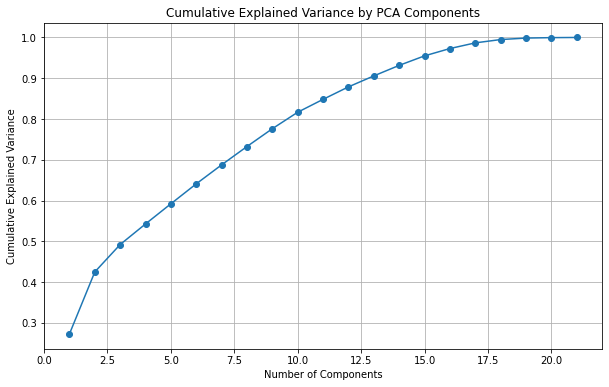

Number of components to keep: 15


In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the numerical columns for PCA
num_cols = [
    'ABSAntilockBrakingSystem', 'AirConditioner', 'Airbags',
    'Bootspacelitres', 'Displacementcc', 'FueltankCapacitylitres',
    'GroundClearancemm', 'MaxPowerbhp', 'MaxPowerrpm', 'MaxTorqueNm',
    'SeatingCapacity', 'content.duplicateKey',
    'content.fitnessUpto_months_remaining', 'content.insuranceExpiry_months_remaining',
    'content.odometerReading', 'content.onRoadPrice', 'content.ownerNumber',
    'content.year', 'defects', 'repainted', 'tyre_health_pct'
]

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(data_df[num_cols])

# Step 3: Determine the Number of Components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components that explain a sufficient amount of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # e.g., 95% variance
print(f'Number of components to keep: {n_components}')

# Fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

# Step 4: Create a DataFrame with PCA components and meaningful names
# Create meaningful column names based on the original features
feature_names = np.array(num_cols)
components_df = pd.DataFrame(pca.components_, columns=feature_names)

# Get the most significant features forX_scaled each principal component
pca_columns = []
for i in range(n_components):
    most_significant = components_df.iloc[i].abs().nlargest(3).index.tolist()  # top 3 features
    pca_columns.append(f"PC{i + 1} ({', '.join(most_significant)})")  # Example: "PC1 (Feature1, Feature2, Feature3)"

# Create PCA DataFrame with meaningful names
pca_df = pd.DataFrame(X_pca_final, columns=pca_columns)

# Combine PCA features with the original DataFrame (if needed)
feature_extraction_df = pd.concat([data_df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

In [52]:
feature_extraction_df.head()

,content.bodyType_SUV,content.bodyType_Sedan,content.fuelType_Diesel,content.fuelType_Petrol,content.insuranceType_Comprehensive,content.insuranceType_Zero Depreciation,content.make_Ford,content.make_Honda,content.make_Hyundai,content.make_Jeep,content.make_KIA,content.make_MG,content.make_Mahindra,content.make_Maruti,content.make_Nissan,content.make_Renault,content.make_Skoda,content.make_Tata,content.make_Toyota,content.make_Volkswagen,content.transmission_Manual,ABSAntilockBrakingSystem,AirConditioner,Airbags,Bootspacelitres,Displacementcc,FueltankCapacitylitres,GroundClearancemm,MaxPowerbhp,MaxPowerrpm,MaxTorqueNm,SeatingCapacity,content.duplicateKey,content.fitnessUpto_months_remaining,content.insuranceExpiry_months_remaining,content.odometerReading,content.ownerNumber,content.year,defects,repainted,tyre_health_pct,content.onRoadPrice,"PC1 (content.onRoadPrice, MaxPowerbhp, MaxTorqueNm)","PC2 (content.fitnessUpto_months_remaining, content.year, content.odometerReading)","PC3 (SeatingCapacity, Bootspacelitres, MaxPowerrpm)","PC4 (content.duplicateKey, AirConditioner, MaxPowerrpm)","PC5 (content.duplicateKey, tyre_health_pct, ABSAntilockBrakingSystem)","PC6 (content.ownerNumber, AirConditioner, tyre_health_pct)","PC7 (AirConditioner, MaxPowerrpm, content.ownerNumber)","PC8 (content.insuranceExpiry_months_remaining, content.ownerNumber, repainted)","PC9 (tyre_health_pct, content.insuranceExpiry_months_remaining, AirConditioner)","PC10 (repainted, MaxPowerrpm, content.ownerNumber)","PC11 (GroundClearancemm, Airbags, MaxPowerrpm)","PC12 (defects, repainted, content.insuranceExpiry_months_remaining)","PC13 (Airbags, GroundClearancemm, Displacementcc)","PC14 (content.odometerReading, GroundClearancemm, ABSAntilockBrakingSystem)","PC15 (FueltankCapacitylitres, content.odometerReading, SeatingCapacity)"
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.514443,0.019181,-0.130144,-2.334408,-0.972044,-0.205031,0.353909,-0.797563,0.776046,-0.685810,3.977453,-0.605253,1.744502,-0.061099,-1.529746,-0.540045,1.599036,-0.349985,-0.947802,0.251950,-0.482138,-0.137284,3.579235,3.797288,0.917874,-1.103741,-0.623633,-0.286453,-0.339551,0.754421,-1.130488,1.145187,0.208494,-0.586426,0.814844,-0.013092
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.514443,0.019181,-0.130144,-0.773836,-0.161089,-0.824602,-0.443662,-0.226005,0.426485,-0.401347,-0.224964,-0.605253,0.553134,-0.854701,-0.181532,1.654846,0.547917,-0.203606,-0.023023,0.909390,-0.545123,-0.676135,1.035920,0.070930,-0.147910,-0.420785,1.296563,-0.143739,-1.286638,1.232509,0.416420,-0.040856,-0.215700,-0.293819,0.402990,0.106429
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.514443,0.019181,-0.130144,0.855876,-0.169198,0.166711,-0.643054,-0.348482,0.426485,-0.384614,-0.224964,-0.605253,-0.551061,0.997037,0.527392,-0.540045,-0.503202,0.089152,-0.947802,-2.377809,-0.523567,-0.829081,-0.263024,-0.899739,-0.820514,-1.184660,-0.697068,-0.862221,0.437311,-1.943567,-0.805017,-0.472377,0.806023,-0.536793,-0.067961,-0.271578
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.514443,0.019181,-0.130144,-0.596049,-0.169198,-1.196344,0.220981,-0.348482,0.426485,-0.401347,-0.224964,-0.605253,1.279578,-0.854701,-0.455622,-0.540045,1.248663,-0.203606,-0.639542,0.909390,-0.858999,-0.216971,2.299302,-0.214719,-0.101409,-0.402548,-0.151403,0.943961,-0.398517,1.108464,-0.261982,0.156482,0.168450,-0.035280,0.518196,-0.032959
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.514443,0.019181,-0.130144,0.292884,-0.161089,0.290625,2.148443,1.162066,-0.272638,0.552437,-0.224964,1.652201,1.163347,0.997037,-0.919648,-0.540045,1.248663,-0.789121,-0.639542,0.909390,0.590737,2.684580,1.678364,-0.260076,0.439638,1.898393,-0.274423,0.418634,0.275167,-0.598391,0.549349,1.242241,0.374627,0.536956,0.649024,-0.052003


In [53]:
feature_extraction_df.shape

(2719, 57)

### Perform modeling on both before & after PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Define regression models
linear_regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet()
}

non_linear_regression_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor()
}

advanced_regression_models = {
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(learning_rate=0.1, iterations=500, depth=6, silent=True)
}

# Deep Learning Model
def build_keras_nn(X_train, y_train):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Combine all models into one dictionary
all_models = {
    **linear_regression_models,
    **non_linear_regression_models,
    **advanced_regression_models,
    'Keras Neural Network': build_keras_nn
}

# Function to apply all regression models to a dataset using cross-validation
def apply_regression_models(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Preprocessing: Convert categorical variables to dummy variables, and scale features
    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
    X = StandardScaler().fit_transform(X)  # Standard scaling
    
    # Dictionary to hold results
    results = []
    
    # Apply each model using cross-validation
    for name, model in all_models.items():
        try:
            if name == 'Keras Neural Network':
                # Keras model needs to be fit on the entire dataset
                build_keras_nn(X, y)
                y_pred = model.predict(X)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            else:
                # Use cross-validation
                scores = cross_val_score(model, X, y, scoring='r2', cv=5)
                r2 = np.mean(scores)
                mse = -np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
            
            # Store result
            results.append({
                'Algorithm': name,
                'MSE': mse,
                'R²': r2
            })
        except Exception as e:
            print(f"Error occurred while processing model {name}: {e}")
    
    # Return the results as a DataFrame, if any results exist
    if results:
        return pd.DataFrame(results)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no results


# Assuming data_df and feature_extraction_df are defined and contain the target column
datasets = [data_df, feature_extraction_df]

# Initialize a list to store results for both datasets
results_all_datasets = []

# Loop over the datasets
for idx, dataset in enumerate(datasets, start=1):
    try:
        print(f"Applying models to dataset {idx}")
        target_column = 'content.onRoadPrice'  # Adjust as necessary

        # Apply regression models on the current dataset
        results_df = apply_regression_models(dataset, target_column)

        # Check if results_df is not empty before appending
        if not results_df.empty:
            results_df['Dataset'] = f'dataset_{idx}'  # Add dataset identifier
            results_all_datasets.append(results_df)
        else:
            print(f"No results for dataset {idx}")
    except Exception as e:
        print(f"Error applying models to dataset {idx}: {e}")

# Combine results of all datasets into one DataFrame
if results_all_datasets:
    final_results = pd.concat(results_all_datasets, ignore_index=True)
    final_results_sorted = final_results.sort_values(by='R²', ascending=False)

    # Display the sorted results
    print(final_results_sorted[['Dataset', 'Algorithm', 'R²', 'MSE']])
else:
    print("No results to concatenate.")

NameError: name 'data_df' is not defined

### Getting 0.99 r2 score on feature_extraction_df, Need to check if its overfitting !!

Applying models to dataset 1


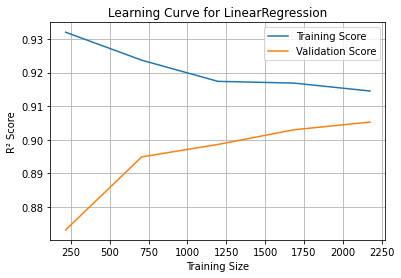

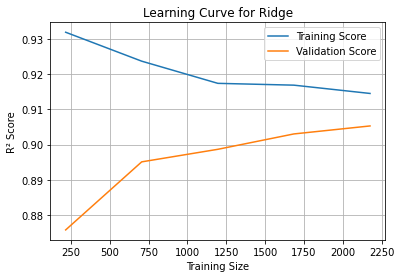

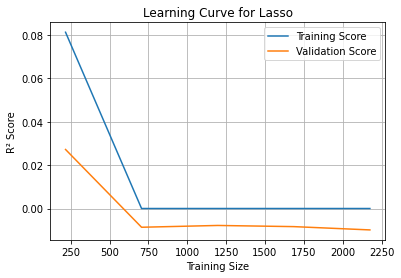

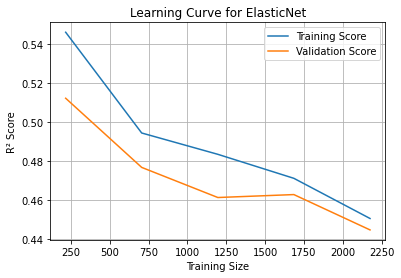

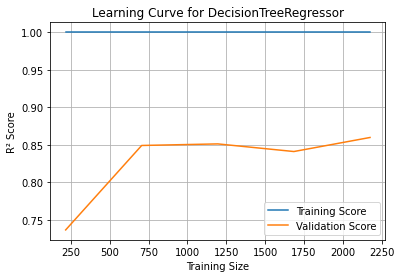

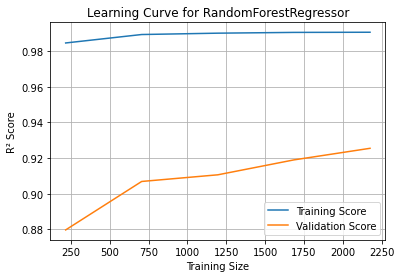

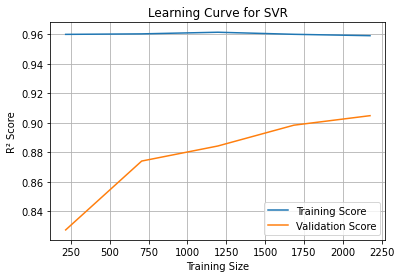

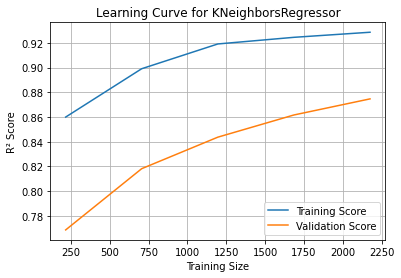

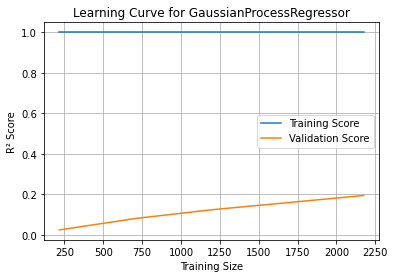

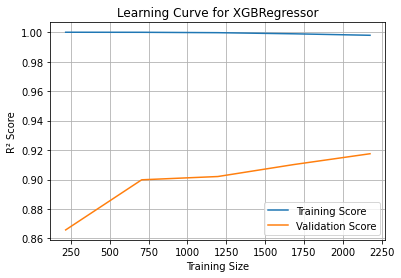

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 37
[LightGBM] [Info] Start training from score -0.007510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 38
[LightGBM] [Info] Start training from score 0.016347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

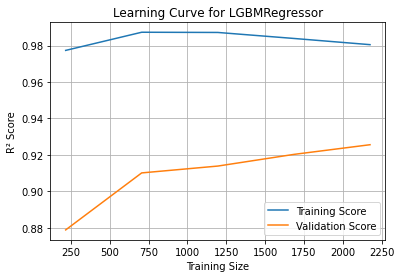

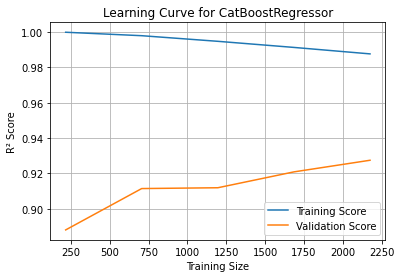

Error occurred while processing model Keras Neural Network: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got <function build_keras_nn at 0x000001B3BF1B7AC0> instead.
Applying models to dataset 2


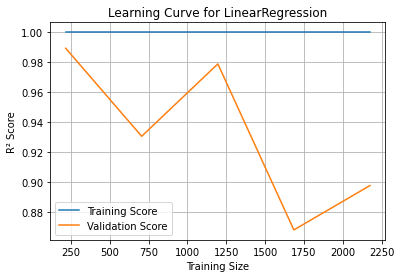

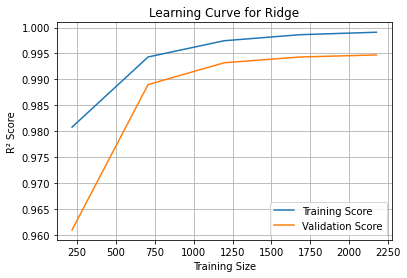

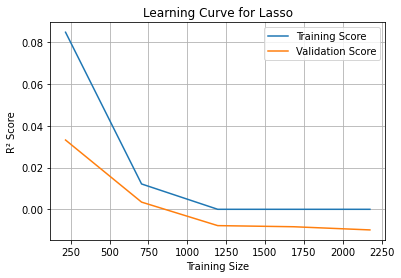

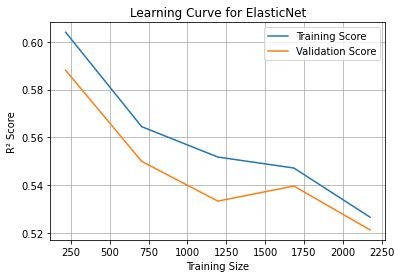

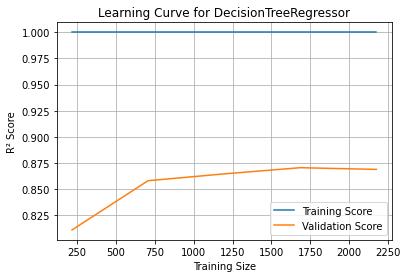

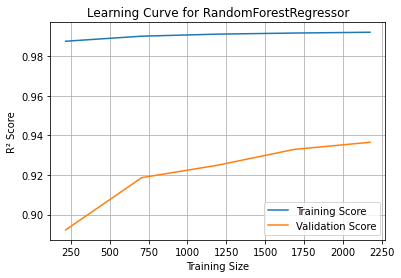

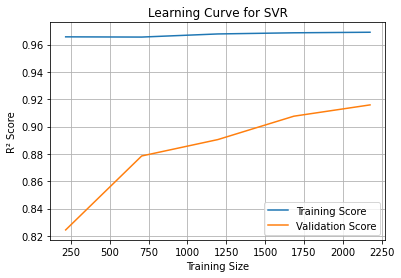

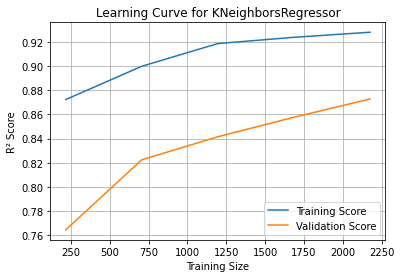

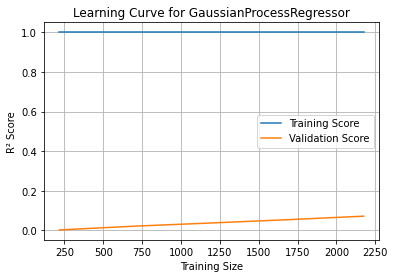

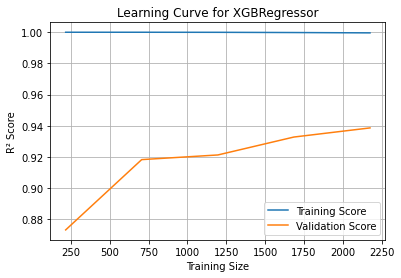

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4954
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 52
[LightGBM] [Info] Start training from score -0.007510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4969
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 53
[LightGBM] [Info] Start training from score 0.016347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bin

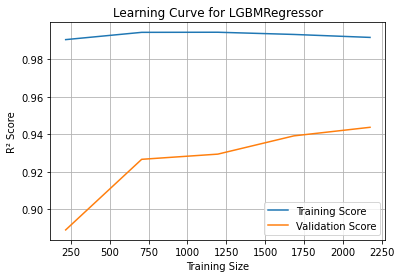

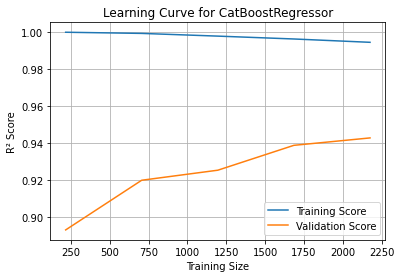

Error occurred while processing model Keras Neural Network: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got <function build_keras_nn at 0x000001B3BF1B7AC0> instead.
      Dataset                     Algorithm        R²       MSE
12  dataset_2             Linear Regression  0.999884  0.000118
13  dataset_2              Ridge Regression  0.994717  0.005371
22  dataset_2                      LightGBM  0.943548  0.056603
23  dataset_2                      CatBoost  0.943331  0.056877
21  dataset_2                       XGBoost  0.938904  0.061133
17  dataset_2                 Random Forest  0.936906  0.063842
11  dataset_1                      CatBoost  0.927230  0.072997
10  dataset_1                      LightGBM  0.925647  0.074599
5   dataset_1                 Random Forest  0.925564  0.075748
9   dataset_1                       XGBoost  0.917226  0.082832
18  dataset_2  Support Vector Machine (SVR)  0.915926  0.084375
1   dataset_1              R

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define regression models
linear_regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet()
}

non_linear_regression_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor()
}

advanced_regression_models = {
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(learning_rate=0.1, iterations=500, depth=6, silent=True)
}

# Deep Learning Model
def build_keras_nn(X_train, y_train):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Combine all models into one dictionary
all_models = {
    **linear_regression_models,
    **non_linear_regression_models,
    **advanced_regression_models,
    'Keras Neural Network': build_keras_nn
}

# Function to plot learning curves
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Score')
    plt.plot(train_sizes, test_mean, label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('R² Score')
    plt.title(f'Learning Curve for {model.__class__.__name__}')
    plt.legend()
    plt.grid()
    plt.show()

# Function to apply all regression models to a dataset using cross-validation
def apply_regression_models(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Preprocessing: Convert categorical variables to dummy variables, and scale features
    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
    X = StandardScaler().fit_transform(X)  # Standard scaling
    
    # Dictionary to hold results
    results = []
    
    # Apply each model using cross-validation
    for name, model in all_models.items():
        try:
            # Use cross-validation
            scores = cross_val_score(model, X, y, scoring='r2', cv=5)
            r2 = np.mean(scores)
            mse = -np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))

            # Store result
            results.append({
                'Algorithm': name,
                'MSE': mse,
                'R²': r2
            })

            # Plot learning curve for non-Keras models
            if name != 'Keras Neural Network':
                plot_learning_curve(model, X, y)

        except Exception as e:
            print(f"Error occurred while processing model {name}: {e}")

    # Return the results as a DataFrame, if any results exist
    if results:
        return pd.DataFrame(results)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no results

# Assuming data_df and feature_extraction_df are defined and contain the target column
datasets = [data_df, feature_extraction_df]

# Initialize a list to store results for both datasets
results_all_datasets = []

# Loop over the datasets
for idx, dataset in enumerate(datasets, start=1):
    try:
        print(f"Applying models to dataset {idx}")
        target_column = 'content.onRoadPrice'  # Adjust as necessary

        # Apply regression models on the current dataset
        results_df = apply_regression_models(dataset, target_column)

        # Check if results_df is not empty before appending
        if not results_df.empty:
            results_df['Dataset'] = f'dataset_{idx}'  # Add dataset identifier
            results_all_datasets.append(results_df)
        else:
            print(f"No results for dataset {idx}")
    except Exception as e:
        print(f"Error applying models to dataset {idx}: {e}")

# Combine results of all datasets into one DataFrame
if results_all_datasets:
    final_results = pd.concat(results_all_datasets, ignore_index=True)
    final_results_sorted = final_results.sort_values(by='R²', ascending=False)

    # Display the sorted results
    print(final_results_sorted[['Dataset', 'Algorithm', 'R²', 'MSE']])
else:
    print("No results to concatenate.")